Importing the Required Libraries

In [222]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow_hub as tf_hub
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

Uploading the Dataset

In [223]:
data = pd.read_csv("Spam_dataset.csv", names = ['label', 'text'], sep = ',', encoding= 'latin-1')
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Shape of Data

In [224]:
data.shape

(5572, 2)

Checking whether if there is Null data or not.

In [225]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [226]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Pie Chart for  seeing the ratio of Spam and Not Spam Labels

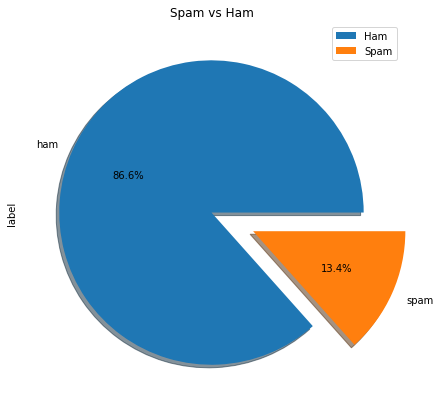

In [227]:
data["label"].value_counts().plot(kind = 'pie',explode=[0, 0.3],figsize=(7, 7),autopct='%1.1f%%',shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [228]:
data['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ?¬ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

Removing the Special Characters from text

In [229]:
def remove_Special_Characters(string):
    return re.sub('[^A-Za-z,]+', ' ', string)
    #return re.sub(pattern, '', string)
      
string = ' I $ S %  H  A 124*&^%$#@! N'
print(remove_Special_Characters(string))

 I S H A N


In [230]:
data['text'][5569]

'Pity, * was in mood for that. So...any other suggestions?'

In [231]:
remove_Special_Characters(data['text'][5569])

'Pity, was in mood for that So any other suggestions '

In [232]:
for i in range(len(data['text'])):
  data['text'][i] = remove_Special_Characters(data['text'][i])

Labeling the SPam and Ham type strings to 1 and 0 respectively

In [233]:
data['label'] = data['label'].replace(to_replace = {"ham":0, "spam":1})

In [293]:
data.tail()

,label,text
5567,1,This is the nd time we have tried contact u U ...
5568,0,Will b going to esplanade fr home
5569,0,"Pity, was in mood for that So any other sugges..."
5570,0,The guy did some bitching but I acted like i d...
5571,0,Rofl Its true to its name


In [324]:
data['text'][5567]

'This is the nd time we have tried contact u U have won the Pound prize claim is easy, call NOW Only p per minute BT national rate '

In [235]:
data['text']

0       Go until jurong point, crazy Available only in...
1                                Ok lar Joking wif u oni 
2       Free entry in a wkly comp to win FA Cup final ...
3            U dun say so early hor U c already then say 
4       Nah I don t think he goes to usf, he lives aro...
                              ...                        
5567    This is the nd time we have tried contact u U ...
5568                   Will b going to esplanade fr home 
5569    Pity, was in mood for that So any other sugges...
5570    The guy did some bitching but I acted like i d...
5571                            Rofl Its true to its name
Name: text, Length: 5572, dtype: object

Making the sentence of each row text and label lists 

In [306]:
sentence_data = []
sentence_label = []
for i in range(len(data['text'])):
  sentence_data.append(data['text'][i])
  sentence_label.append(data['label'][i])

Splitting the dataset into Training and Testing Data

In [307]:
X_train, X_test, y_train, y_test =  train_test_split(sentence_data, sentence_label, test_size = 0.2, random_state = 42)

Converting  texts to numbers and padding them so that all sentence should be of same length

In [313]:
vocab_size = 8000
max_length = 25


tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
train_sequences = pad_sequences(train_sequences, maxlen = max_lenght, padding = 'post')
#input_sequences[0]
total_words = len(tokenizer.word_index) + 1
total_words

6895

In [314]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences = pad_sequences(test_sequences, maxlen= max_length, padding= 'post')

In [350]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Creating the Model, using Embedding Layer and Bidirectional LSTM.

In [318]:
vocab_size = 8000
embedding_dim = 100
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 25, 100)           800000    
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 25, 256)           234496    
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 25, 128)           164352    
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 128)               98816     
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_79 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)              

Training the Model

In [321]:
model.fit(train_sequences, y_train, epochs = 5, validation_data= (test_sequences, y_test))

Epoch 1/5
140/140 [==============================] - 36s 181ms/step - loss: 0.3083 - accuracy: 0.8844 - val_loss: 0.0670 - val_accuracy: 0.9883
Epoch 2/5
140/140 [==============================] - 23s 162ms/step - loss: 0.0350 - accuracy: 0.9940 - val_loss: 0.0401 - val_accuracy: 0.9919
Epoch 3/5
140/140 [==============================] - 22s 160ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.0506 - val_accuracy: 0.9910
Epoch 4/5
140/140 [==============================] - 22s 158ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0841 - val_accuracy: 0.9910
Epoch 5/5
140/140 [==============================] - 23s 162ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.1244 - val_accuracy: 0.9892


Predicting the New Sentences

In [330]:
test_sentence = 'You won a very Excitting prize, to coolect the prize register soon'
sequence = tokenizer.texts_to_sequences([test_sentence])
#print(sequence)
padded = pad_sequences(sequence, maxlen=max_length, padding= "post")
#print(padded)
print(model.predict(padded)[0][0])
if model.predict(padded)[0][0]>0.5:
  print("It is a Spam")

else:
  print("It is not a Spam")

0.6205792
It is a Spam


In [345]:
def predict_sentence(text):
  test_sentence = text
  sequence = tokenizer.texts_to_sequences([test_sentence])
  padded = pad_sequences(sequence, maxlen=max_length, padding= "post")
  #print(model.predict(padded)[0][0])
  if model.predict(padded)[0][0]>0.5:
    print("It is a Spam Sentence")

  else:
    print("It is not a Spam Sentence")

In [348]:
predict_sentence('You won a very Excitting prize, to collect the prize register soon')

It is a Spam Sentence


In [349]:
predict_sentence('Hey, I just texted to know whether you are doing okay !')

It is not a Spam Sentence
